<a href="https://colab.research.google.com/github/Sergey-Tkachenko/ml_mipt_homeworks/blob/master/Lab1/Lab1_part2_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1. 

Данная лабораторная работа состоит из нескольких блоков. В каждом блоке вам предлагается произвести некоторые манипуляции с данными и сделать некоторые выводы.
* Задавать вопросы можно и нужно.
* Списывать не нужно. Работы, которые были списаны обнуляются.
* Блоки выполняются последовательно и оцениваются отдельно.

##  Part 2. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [0]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

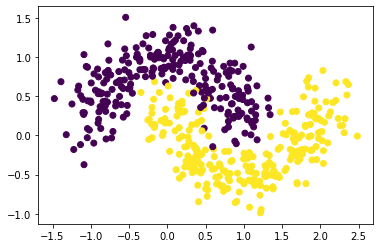

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression() # add some params
svm = SVC(kernel='linear') # here too

### YOUR CODE HERE

In [0]:
#define some userful stuff

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def give_pipe(estimator):
  steps = [('scale', StandardScaler()), ('model', estimator)]
  return Pipeline(steps)


In [0]:
#evaluate log_reg
from sklearn.model_selection import GridSearchCV
param_to_grid = {"model__C":np.linspace(0.1, 1, 5)}
lr_cv = GridSearchCV(give_pipe(LogisticRegression(solver='saga', max_iter=5000)), param_to_grid)

In [6]:
lr_cv.fit(moons_points, moons_labels);

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


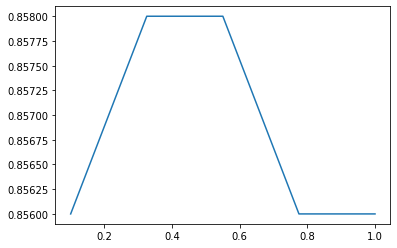

In [7]:
moon_grid_cv_scores = lr_cv.cv_results_['mean_test_score']
plt.plot(lr_cv.param_grid['model__C'],  moon_grid_cv_scores)
#Take C = 0.4

In [8]:
lr = give_pipe(LogisticRegression(solver='saga', max_iter=5000, C=0.4))
lr.fit(moons_points, moons_labels)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 LogisticRegression(C=0.4, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=5000,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

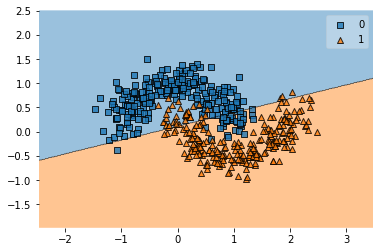

In [9]:
plot_decision_regions(moons_points, moons_labels, lr)

In [10]:
from sklearn.metrics import f1_score
print("LogReg f1:", f1_score(moons_labels, lr.predict(moons_points)))

LogReg f1: 0.8588709677419355


In [11]:
#Now let's deal with SVM linear case
param_to_grid = {"model__C":np.linspace(0.1, 100, 10)}

grid_svm_linear = GridSearchCV(give_pipe(SVC(kernel='linear')),  param_to_grid)
grid_svm_linear.fit(moons_points,  moons_labels);

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


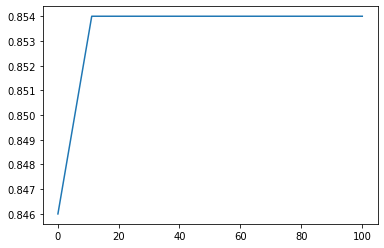

In [12]:
plt.plot(param_to_grid['model__C'], grid_svm_linear.cv_results_['mean_test_score'])
#Take 20

In [13]:
svc = give_pipe(SVC(kernel='linear', C=20))
svc.fit(moons_points, moons_labels)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

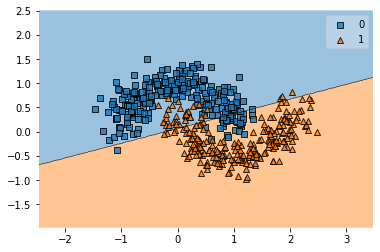

In [14]:
plot_decision_regions(moons_points, moons_labels, svc)

In [15]:
print("f1_score SVC_linear:",  f1_score(moons_labels,  svc.predict(moons_points)))

f1_score SVC_linear: 0.8606060606060605


# Short summary
Мы можем заметить, что обе модели дали примерно одинаковый результат.
Это логично, поскольку 

* Они обе - линейные модели, которые каждая по своему старались получить лучший результат. И так как выборка линейно неразделима, то обе модели не могли получить качество, выше определенного порога, и поэтому их результаты очень схожи.

* Логистичекая регрессия пыталась оптимизироваться так, чтобы корректно выдавать вероятности принадлежности к классу, в то время как SVM старался, с одной стороны, минимизировать вектор w, а с другой - сделать допущения для всех x меньше. 

## 1.2 Kernel tirck

![keep-calm](imgs/keep-calm.jpg)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [16]:
### YOUR CODE HERE

#Firstly , we will try to use poy kernel

gamma = ['scale', 'auto']
degree = [1, 2, 3, 4, 5, 6]
C = np.linspace(0.1, 1, 10)
param_to_grid = {"model__C":C, "model__degree":degree, "model__gamma":gamma}
gs_poly_svc = GridSearchCV(give_pipe(SVC(kernel='poly')), param_to_grid)
gs_poly_svc.fit(moons_points, moons_labels)



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='poly', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
         

In [0]:
#Have a look at cv_res
gs_poly_svc.cv_results_;

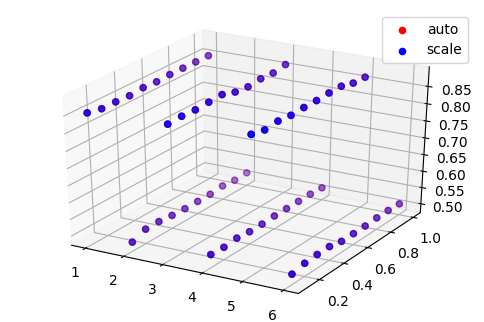

In [18]:
%matplotlib inline
from mpl_toolkits import mplot3d

ax = plt.figure(dpi=100)
ax = plt.axes(projection='3d')

scores_auto = [score for i, score in enumerate(gs_poly_svc.cv_results_['mean_test_score']) if gs_poly_svc.cv_results_['params'][i]['model__gamma'] == 'auto']
scores_scale = [score for i, score in enumerate(gs_poly_svc.cv_results_['mean_test_score']) if gs_poly_svc.cv_results_['params'][i]['model__gamma'] == 'scale']
degree_grid = [param['model__degree'] for param in gs_poly_svc.cv_results_['params'] if param['model__gamma'] == 'scale']
C_grid = [param['model__C'] for param in gs_poly_svc.cv_results_['params'] if param['model__gamma'] == 'scale']
ax.scatter(degree_grid,  C_grid, scores_auto, color='red', label='auto')
ax.scatter(degree_grid, C_grid, scores_scale, color='blue', label='scale')
ax.legend()
# По грифку мы можем видеть, что от выбора gamma ровным счетом ничего не зависит(точки перекрываются с точкми scale),
#а во-вторых, что нечётые степени всегда дают значительно лучший результат

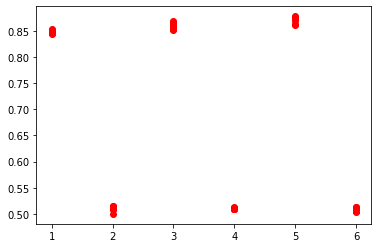

In [19]:
gs_poly_svc.best_params_
plt.plot(degree_grid, scores_scale, 'ro')

Poly_f1: 0.8708971553610503


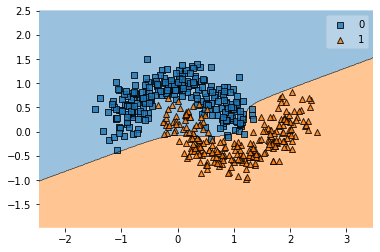

In [20]:
#Let's fit poly SVC
poly_svc = give_pipe(SVC(C = 0.8, kernel='poly', degree=5, gamma='scale'))
poly_svc.fit(moons_points, moons_labels)
plot_decision_regions(moons_points, moons_labels, poly_svc)
print("Poly_f1:", f1_score(poly_svc.predict(moons_points), moons_labels))

rbf_f1, C=0.001: 0.8674698795180723
rbf_f1, C=0.1: 0.9243353783231084
rbf_f1, C=1: 0.9738430583501007
rbf_f1, C=10: 0.9799196787148594
rbf_f1, C=1000: 0.9840637450199202


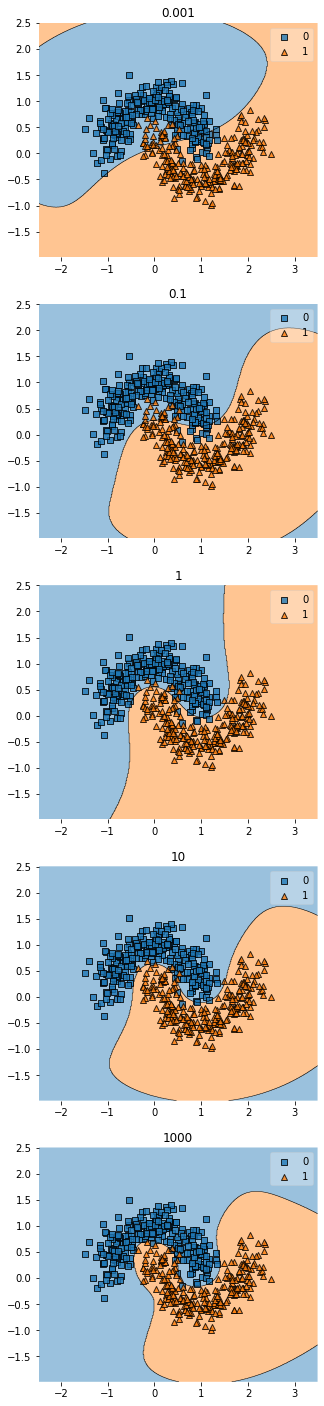

In [21]:
#Let's try RBF kernel func
#When we increase C,  reds becomes dominant, and when we reduce C, blues does
#So C = 1 is neutral and the best, I guess
C = [0.001, 0.1, 1, 10, 1000]
plt.figure(figsize=(5, 25))
for i, _C in enumerate(C):
  plt.subplot(len(C),1, i + 1)
  rbf_svc = give_pipe(SVC(C=_C, kernel='rbf', gamma='scale'))
  rbf_svc.fit(moons_points,  moons_labels)
  plot_decision_regions(moons_points,  moons_labels, rbf_svc)
  plt.title(str(_C))
  print("rbf_f1, C={}:".format(_C), f1_score(rbf_svc.predict(moons_points), moons_labels))

In [22]:
#I think we can't get better result than rbf, but let's try sigmoid kernel
#There are two significant parameters: C and coeff 0. I got (by hands) that we should vary C
#in range ~(0.001 to 5) and coeffin range(0, 10)
param_to_grid = {"model__coef0":np.linspace(0, 10, 20), "model__C":np.linspace(0.01, 5, 20)}

gs_sigm_svc = GridSearchCV(give_pipe(SVC(kernel='sigmoid', gamma='scale', C=0.05, coef0=10)), param_to_grid)
gs_sigm_svc.fit(moons_points, moons_labels)
#plot_decision_regions(moons_points, moons_labels, sigm_svc)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVC(C=0.05, cache_size=200,
                                            class_weight=None, coef0=10,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='sigmoid', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=Tr...
       3.94947368, 4.21210526, 4.47473684, 4.73736842, 5.        ]),
                    

In [23]:
gs_sigm_svc.best_params_

{'model__C': 3.6868421052631577, 'model__coef0': 4.7368421052631575}

sigm_svc f1: 0.973947895791583


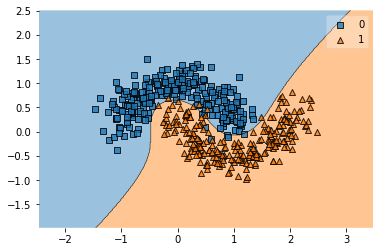

In [24]:
#Let's try this params
sigm_svc = give_pipe(SVC(kernel="poly", C=3.6868421052631577, gamma='scale', coef0=4.7368421052631575))
sigm_svc.fit(moons_points, moons_labels)
plot_decision_regions(moons_points, moons_labels, sigm_svc)
print("sigm_svc f1:", f1_score(moons_labels, sigm_svc.predict(moons_points)))

#Summary 2
Мы опробовали разные типы ядер для SVC. Наилучшие результаты были показаны на RBF и Sigmoid, poly несмотря на все надежды(казалось кубическая парабола должна хорошо разделять представленную выборку), показало не столь высокие результаты. Заметим, что изначально на Sigmoid не возлагалось больших надежд, однако при помощи GridSearch  удалось подобрать оптимальные параметры так, чтобы качество было таким же, как и у RBF.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

f1_log_reg: 0.969939879759519


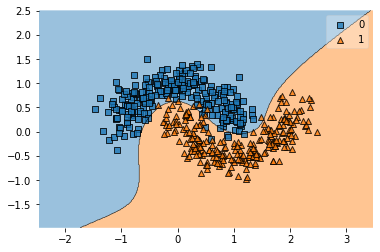

In [25]:
from sklearn.preprocessing import PolynomialFeatures

### YOUR CODE HERE
#lets try vary degree(I thin it will 3)
poly = PolynomialFeatures(degree=7)

lr_steps = [('transform_data', poly), ('model',  give_pipe(LogisticRegression(solver='saga', max_iter=5000,  C=5)))]
poly_lr = Pipeline(lr_steps)
poly_lr.fit(moons_points, moons_labels)
plot_decision_regions(moons_points, moons_labels, poly_lr)
print("f1_log_reg:", f1_score(poly_lr.predict(moons_points), moons_labels))
#Even without grid search we can see that our model shows same quality as rbf or sigmoid shows

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

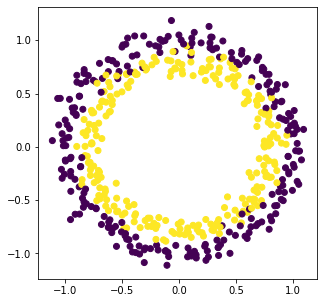

In [26]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

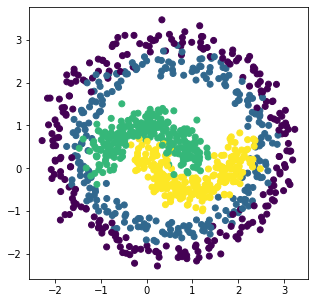

In [27]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

f1_score poly_svc: 0.9341317365269461


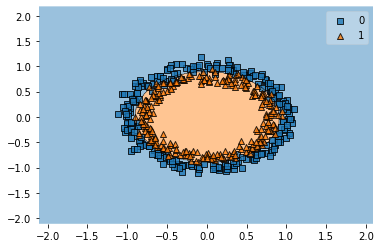

In [28]:
#Let's deal with circles datset
circle_svc = give_pipe(SVC(kernel='poly', degree=2, gamma='scale'))
circle_svc.fit(circles_points, circles_labels)
plot_decision_regions(circles_points, circles_labels, circle_svc)
print("f1_score poly_svc:", f1_score(circles_labels, circle_svc.predict(circles_points)))
#We can see that there is a radial symmetry, so the idea to use poly with degree 2 worked well

f1_circle_logreg: 0.9381237524950099


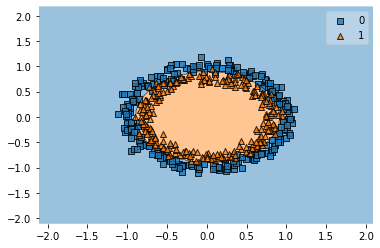

In [33]:
#Let's try logreg
circle_logreg_steps = [('transform_features', PolynomialFeatures(degree=2)), ('model', give_pipe(LogisticRegression(solver='saga', max_iter=5000)))]
circle_logit = Pipeline(circle_logreg_steps)
circle_logit.fit(circles_points, circles_labels)
plot_decision_regions(circles_points, circles_labels, circle_logit)
print("f1_circle_logreg:", f1_score(circles_labels, circle_logit.predict(circles_points)))
#As we can see, LogisticRegression have done well because of data transformation

In [0]:
#Now we gonna deal with the last case
#First, let's try logistic regression

steps = [('transform_data', PolynomialFeatures(degree=5)), ()]